<a href="https://colab.research.google.com/github/Duy76/BTVN/blob/main/nhan_dien_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/nhan dien mat

/content/drive/MyDrive/Colab Notebooks/nhan dien mat


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/nhan dien mat/train',target_size=(200,200), batch_size=32, class_mode='categorical')

Found 180 images belonging to 3 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/nhan dien mat/validation',target_size=(200,200), batch_size=32, class_mode='categorical')

Found 180 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Anh': 0, 'Duy': 1, 'Hoang': 2}

In [ ]:
validation.class_indices

{'Anh': 0, 'Duy': 1, 'Hoang': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(200,200,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
6/6 [==============================] - 225s 42s/step - loss: 8.9592 - accuracy: 0.3889 - val_loss: 0.7349 - val_accuracy: 0.7222
Epoch 2/100
6/6 [==============================] - 20s 4s/step - loss: 0.5524 - accuracy: 0.8444 - val_loss: 0.4704 - val_accuracy: 0.7389
Epoch 3/100
6/6 [==============================] - 20s 4s/step - loss: 0.3224 - accuracy: 0.9111 - val_loss: 0.1888 - val_accuracy: 0.9389
Epoch 4/100
6/6 [==============================] - 20s 4s/step - loss: 0.0950 - accuracy: 0.9889 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 5/100
6/6 [==============================] - 20s 4s/step - loss: 0.1094 - accuracy: 0.9722 - val_loss: 0.0687 - val_accuracy: 0.9667
Epoch 6/100
6/6 [==============================] - 20s 4s/step - loss: 0.0266 - accuracy: 0.9889 - val_loss: 0.0958 - val_accuracy: 0.9611
Epoch 7/100
6/6 [==============================] - 20s 4s/step - loss: 0.0671 - accuracy: 0.9778 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 8/100
6/6 [========

In [ ]:
model.save("nhan_dien_khuon_mat.h5")

In [ ]:
model_CNN=load_model('nhan_dien_khuon_mat.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose = 0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 2.324565144817825e-07
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

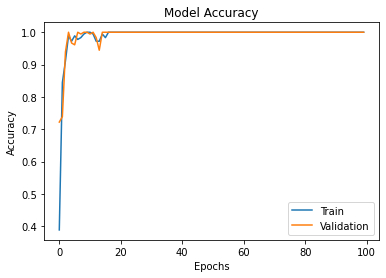

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FCE23D6BC10>
1/1 [==============================] - 0s 353ms/step
Đây là: Anh
Chu thich: Du lieu nam trong Test1


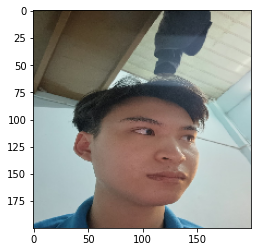

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FCE4A48E990>
1/1 [==============================] - 0s 16ms/step
Đây là: Duy
Chu thich: Du lieu nam trong Test1


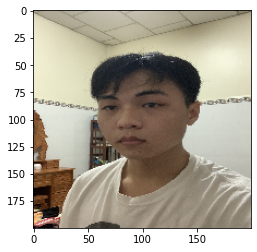

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FCE23BD9910>
1/1 [==============================] - 0s 23ms/step
Đây là:   Hoang   
Chu thich: Du lieu nam trong Test1


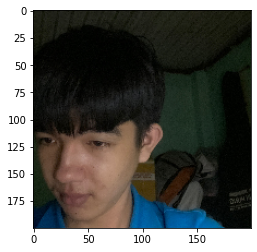

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FCE2478BAD0>
1/1 [==============================] - 0s 17ms/step
Đây là: Anh
Chu thich: Du lieu nam trong Test2


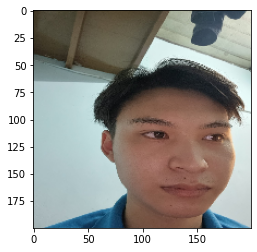

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FCE25FE0790>
1/1 [==============================] - 0s 20ms/step
Đây là: Duy
Chu thich: Du lieu nam trong Test2


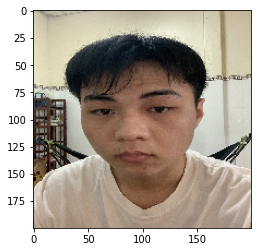

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FCE25F4DD50>
1/1 [==============================] - 0s 18ms/step
Đây là:   Hoang   
Chu thich: Du lieu nam trong Test2


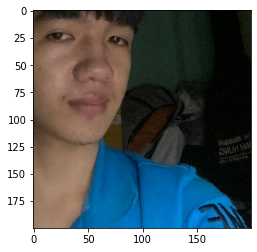

In [ ]:
test1="/content/drive/MyDrive/Colab Notebooks/nhan dien mat/test/test 1"
test2="/content/drive/MyDrive/Colab Notebooks/nhan dien mat/test/test 2"
test = [test1, test2]
stt = 0
for j in test:
  stt += 1
  for i in os.listdir(j):
    img=load_img(j+'/'+i,target_size=(200,200))
    print(img)
    plt.imshow(img)
    img=img_to_array(img)
    img=img.astype('float32')
    img=img/255
    img=np.expand_dims(img,axis=0)
    result=model_CNN.predict(img)
    if round(result[0][0])==1:
      prediction='Anh'
    if round(result[0][1])==1:
      prediction='Duy'
    if round(result[0][2])==1:
      prediction='  Hoang   '
    print('Đây là:',prediction)
    print(f'Chu thich: Du lieu nam trong Test{stt}')
    plt.show()